###### World Happiness Report 2023

## Selected World Hapiness Report

The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by the Gallup World Poll data, released a dataset of World Happiness Report 2023.
This dataset contains a selection of diferrent countries for each state effectiveness, for the years 2008 - 2022.

A detailed description of the dataset can be found on [World Happiness's website](https://worldhappiness.report/ed/2023/) using Data for Table 2.1 as main and Data for Figure 2.1 for support, but to summarize, the dataset has the following variables:
- Country name
- year
- Life Ladder : Happiness score or subjective well-being (variable name ladder), the survey with steps numbered from 0 at the
    bottom to 10 at the top
- Log GDP per capita : The statistics of GDP per capita (variable name gdp) in purchasing power parity
    (PPP)
- Social support : (or having someone to count on in times of trouble) is the national average of the binary responses (either 0 
    or 1)  to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever 
    you need them, or not?”
- Healthy life expectancy at birth : based on the data extracted from the World Health Organization’s (WHO)
- Freedom to make life choices : the national average of responses to the GWP question “Are you satisfied or dissatisfied with 
    your freedom to choose what you do with your life?”
- Generosity : is the residual of regressing national average of response to the GWP question “Have you donated money to a 
    charity in the past month?” on GDP per capita
- Perceptions of corruption : The measure is the national average of the survey responses to two questions in the GWP: “Is 
    corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” 
- Positive affect : is defined as the average of three positive affect measures in GWP: laugh, enjoyment and doing interesting 
    things in the Gallup World Poll waves 3-7
- Negative affect : is defined as the average of three negative affect measures in GWP. They are worry, sadness and anger, respectively

## Objective

In this notebook, we are going to analyze World Happiness Report 2023 data collected. The dataset contains information about the amount of countries across several categories. We are going to find the answers to questions as following:

##### Document 1: EDA (This doc.)
- Importing and Exploring Data
- Data Wrangling (Dealing with Duplicates, Missing values)
- Exploratory Data analysis
    1. What is the average amount of ladder score by countries?    
- Visualization the question:
    2. Which country owns the highest happiness score and the top 10 ranking?
    3. Which country owns the least happinesss score and the last 10 ranking?
    4. What is the effect between Perceptions of corruption and Freedom to make life choices?
    5. Comparison of Log GDP per capita and Healthy life expectancy at birth?
    6. Creating a dashboard in Tableau

Document 2: Model Evaluation
- Exploratory Data analysis
    1. What is the high correlation with life ladder(happiness score)?
- Model Development
    2. What Regression model is suit to predicting the life lader?
- Model Evaluation and Refinement
    3. How to make a prediction on new data?

# Load Data

In [410]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [411]:
#Read in the data

df = pd.read_excel(r"C:\Users\Lenovo\OneDrive\Desktop\Data Analysyst\Data Projects\World Happiness\DataForTable2.1WHR2023.xls")
df.head(40)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326


# Exploring Data

In [412]:
# Find the number of rows

print(len(df.index))

2199


In [413]:
# Find the number of columns

print(len(df.columns))

11


In [414]:
# Find data type of each columns

df.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [415]:
# Find how many unique country in the table

country = df['Country name'].unique()
country

print(len(country))

165


In [416]:
df.describe(include = 'all')

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
unique,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Lebanon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,NaN,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,NaN,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,NaN,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,NaN,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,NaN,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894


# Cleaning Data

### Duplicated values

In [417]:
# Find duplicated values

df.duplicated().sum()

0

### Missing Values

In [418]:
# Find missing values

missing_value = df.isnull()
missing_value.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [419]:
# try to count missing value of Country name

missing_value['Country name'].value_counts()

False    2199
Name: Country name, dtype: int64

In [420]:
# Count missing value by for loop (all columns)

for column in missing_value.columns.values.tolist():
    print(column)
    print(missing_value[column].value_counts())
    print('')

Country name
False    2199
Name: Country name, dtype: int64

year
False    2199
Name: year, dtype: int64

Life Ladder
False    2199
Name: Life Ladder, dtype: int64

Log GDP per capita
False    2179
True       20
Name: Log GDP per capita, dtype: int64

Social support
False    2186
True       13
Name: Social support, dtype: int64

Healthy life expectancy at birth
False    2145
True       54
Name: Healthy life expectancy at birth, dtype: int64

Freedom to make life choices
False    2166
True       33
Name: Freedom to make life choices, dtype: int64

Generosity
False    2126
True       73
Name: Generosity, dtype: int64

Perceptions of corruption
False    2083
True      116
Name: Perceptions of corruption, dtype: int64

Positive affect
False    2175
True       24
Name: Positive affect, dtype: int64

Negative affect
False    2183
True       16
Name: Negative affect, dtype: int64



### Dealing with Missing Values

In [421]:
# Select replament with mean or freq

# Country Name, Year, Life Ladder = No null, no change
# Log GDP per capita, Social support, Healthy life expectancy at birth, Healthy life expectancy at birth, 
#     Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect 
#     = replaced with Mean of each country


In [422]:
#Count only True

capita_missing = missing_value.sum()  #can use sum becuase True = 1
capita_missing

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64

In [423]:
#add column country_index

missing_value['Country index'] = df['Country name']
missing_value.head(40)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country index
0,False,False,False,False,False,False,False,False,False,False,False,Afghanistan
1,False,False,False,False,False,False,False,False,False,False,False,Afghanistan
2,False,False,False,False,False,False,False,False,False,False,False,Afghanistan
3,False,False,False,False,False,False,False,False,False,False,False,Afghanistan
4,False,False,False,False,False,False,False,False,False,False,False,Afghanistan
5,False,False,False,False,False,False,False,False,False,False,False,Afghanistan
6,False,False,False,False,False,False,False,False,False,False,False,Afghanistan
7,False,False,False,False,False,False,False,False,False,False,False,Afghanistan
8,False,False,False,False,False,False,False,False,False,False,False,Afghanistan
9,False,False,False,False,False,False,False,False,False,False,False,Afghanistan


In [424]:
# try to access by loc

missing_value.loc[0, 'Country index']

'Afghanistan'

In [425]:
#set Country index as index

df_set = missing_value
df_set = df_set.set_index('Country index')
df_set.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country index,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False
Afghanistan,False,False,False,False,False,False,False,False,False,False,False
Afghanistan,False,False,False,False,False,False,False,False,False,False,False
Afghanistan,False,False,False,False,False,False,False,False,False,False,False
Afghanistan,False,False,False,False,False,False,False,False,False,False,False


In [426]:
# find cell that contains the boolean value True in df is replaced with True, and all other cells are replaced with False

all_true = df_set[df_set == True]
all_true.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country index,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [427]:
# Find the row and column indices of the cells that contain the boolean value True, you can use the stack()

true_indices = all_true.stack().index.tolist()
#true_indices

In [428]:
type(true_indices)

list

In [429]:
true_indices[1]

('Afghanistan', 'Generosity')

In [430]:
grouped = df.groupby('Country name')
grouped
means = grouped.mean()
means.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Afghanistan,2014.642857,3.346632,7.585588,0.484381,52.533928,0.498487,0.059799,0.842778,0.433324,0.364459
Albania,2014.933333,5.048016,9.396952,0.715872,68.505334,0.683099,-0.074733,0.869554,0.557358,0.293262
Algeria,2015.800000,5.377251,9.339902,0.814826,66.080000,0.530804,-0.140975,0.697673,0.535673,0.267095
Angola,2012.500000,4.420299,8.985655,0.737973,52.150001,0.455957,-0.090508,0.867018,0.625734,0.351173
Argentina,2014.000000,6.283633,10.030438,0.902469,66.664706,0.774616,-0.152436,0.838603,0.739047,0.287630


In [431]:
#See column list

means.columns.tolist()

['year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [432]:
#See index(country) list which have only unuiqe

# means.index.values.tolist()

In [433]:
# Replace NaN in df with mean value of specific country and column as following:

In [434]:

# group the DataFrame by 'Country name' and compute means
grouped = df.groupby('Country name')
means = grouped.mean()

# loop through each row and column of the DataFrame
for i in range(df.shape[0]): # iterate over rows
    for j in range(df.shape[1]): # iterate over columns in each row
        if pd.isna(df.iloc[i, j]): # check if the value is NaN
            country = df.iloc[i, 0] # get the name of the country for the current row
            column_name = df.columns[j] # get the name of the column for the current cell
            mean_value = means.loc[country, column_name] # get the mean value for the corresponding column and country
            df.iloc[i, j] = mean_value # replace NaN with the mean value
#             print(i,j,pd.isna(df.iloc[i, j]),country,column_name,mean_value)

# # print the updated DataFrame
# print(df)



In [435]:
df.head(40)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326


In [436]:
# Check whether have null

df.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   9
Social support                       1
Healthy life expectancy at birth    32
Freedom to make life choices         0
Generosity                           9
Perceptions of corruption           29
Positive affect                      2
Negative affect                      1
dtype: int64

In [437]:
# The all null after replace NaN with mean of each country

all_true_after = df.isnull()[df.isnull() == True]    #find true condition (all false or all true)
all_true_after

all_true_after['Country index'] = df['Country name']  #add new country column
all_true_after

all_true_after = all_true_after.set_index('Country index') #set the new country column into index
all_true_after

true_indices_after = all_true_after.stack().index.tolist()  # see what countries which columns got null
true_indices_after

[('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('China', 'Perceptions of corruption'),
 ('Cuba', 'Log GDP per capita'),
 ('Cuba', 'Generosity'),
 ('Cuba', 'Perceptions of corruption'),
 ('Hong Kong S.A.R. of China', 'Healthy life expectancy at birth'),
 ('Hong Kong S.A.R. of China', 'Healthy life expectancy at birth'),
 ('Hong Kong S.A.R. of China', 'Healthy life expectancy at birth'),
 ('Hong Kong S.A.R. of China', 'Healthy li

In [438]:
df_check = df
df_check = df_check.set_index('Country name')
df_check

# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
df_missing = df_check.loc[('China', 'Cuba', 'Hong Kong S.A.R. of China','Kosovo','Maldives','Oman','Somaliland region','South Sudan','Turkmenistan'), :]
df_missing.head(40)

#The problem is no value in the column of these countries to calulate the mean


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
China,2006,4.560495,8.696139,0.747011,65.660004,0.848398,-0.160441,NaN,0.657659,0.169580
China,2007,4.862862,8.823968,0.810852,65.919998,0.848398,-0.178883,NaN,0.663977,0.158614
China,2008,4.846295,8.910974,0.748287,66.180000,0.853072,-0.095184,NaN,0.705133,0.146963
China,2009,4.454361,8.995829,0.798034,66.440002,0.771143,-0.163264,NaN,0.669666,0.161650
China,2010,4.652737,9.092073,0.767753,66.699997,0.804794,-0.136182,NaN,0.658101,0.158100
China,2011,5.037208,9.177827,0.787171,66.959999,0.824162,-0.189271,NaN,0.710055,0.133503
China,2012,5.094917,9.246742,0.787818,67.220001,0.808255,-0.187489,NaN,0.689160,0.158703
China,2013,5.241090,9.314875,0.777896,67.480003,0.804724,-0.160523,NaN,0.717136,0.142211
China,2014,5.195619,9.380201,0.820366,67.739998,0.848398,-0.219485,NaN,0.709763,0.111518


In [439]:
# create Boolean DataFrame indicating NaN values
missing_bool = df_missing.isna()

# count number of NaN values for each country and column
missing_counts = missing_bool.groupby('Country name').sum()

# display result
print(missing_counts)

                           year  Life Ladder  Log GDP per capita  \
Country name                                                       
China                         0            0                   0   
Cuba                          0            0                   1   
Hong Kong S.A.R. of China     0            0                   0   
Kosovo                        0            0                   0   
Maldives                      0            0                   0   
Oman                          0            0                   0   
Somaliland region             0            0                   4   
South Sudan                   0            0                   4   
Turkmenistan                  0            0                   0   

                           Social support  Healthy life expectancy at birth  \
Country name                                                                  
China                                   0                                 0   
Cuba          

In [440]:
df_check.loc['Turkmenistan'].index.value_counts()

#Conclude Missing
#China : Perceptions of corruption = 16  (2006-2021)
#Cuba : Log GDP per capita = 1, Generosity = 1, Perceptions of corruption =1 (2006)
#Hong Kong S.A.R. of China : Healthy life expectancy at birth = 12 (2006-2021, no 2007,2013,2015,2018)
#Kosovo : Healthy life expectancy at birth = 16 (2007-2022)
#Maldives : Perceptions of corruption = 1, Positive affect = 1,Negative affect = 1 (2018)
#Oman : Social support = 1,Perceptions of corruption = 1, Positive affect = 1 (2011)
#Somaliland region : Log GDP per capita = 4, Healthy life expectancy at birth = 4, Generosity = 4 (2009-2012)
#South Sudan : Log GDP per capita = 4, Healthy life expectancy at birth = 4 (2014-2017)
#Turkmenistan : Perceptions of corruption = 10 (2009-19, no 2010)

Turkmenistan    10
Name: Country name, dtype: int64

### Imputed missing values of support factor columns 

#### The missing data in the World Happiness Report 2023 imputed as the [World Happiness's satatistical Appendix](https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf), Statistical Appendix 1 for Chapter 2. So, we decided to use the file Data for Figure 2.1 which is an average of years 2020-2022 after covid-19 as a support file to fill NaN values in our dataset for the mean value as following:


In [441]:
df_figure = pd.read_excel(r"C:\Users\Lenovo\OneDrive\Desktop\Data Analysyst\Data Projects\World Happiness\DataForFigure2.1WHR2023.xls")
df_figure.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.8042,0.036162,7.875078,7.733322,10.792010,0.968770,71.149994,0.961408,-0.018824,0.181745,1.777825,1.888380,1.584900,0.534574,0.771510,0.126331,0.535299,2.363241
1,Denmark,7.5864,0.041028,7.666815,7.505985,10.962164,0.954112,71.250145,0.933533,0.134242,0.195814,1.777825,1.949406,1.547875,0.537302,0.734416,0.208459,0.525221,2.083766
2,Iceland,7.5296,0.048612,7.624879,7.434321,10.895531,0.982533,72.050018,0.936349,0.210987,0.667848,1.777825,1.925508,1.619666,0.559096,0.738164,0.249635,0.187119,2.250382
3,Israel,7.4729,0.031609,7.534853,7.410946,10.638705,0.943344,72.697205,0.808866,-0.023080,0.708094,1.777825,1.833398,1.520674,0.576730,0.568518,0.124048,0.158292,2.691290
4,Netherlands,7.4030,0.029294,7.460416,7.345583,10.942279,0.930499,71.550018,0.886875,0.212686,0.378929,1.777825,1.942274,1.488228,0.545473,0.672327,0.250547,0.394062,2.110044


In [442]:
df_figure = df_figure.set_index('Country name')
df_figure.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,
Finland,7.8042,0.036162,7.875078,7.733322,10.792010,0.968770,71.149994,0.961408,-0.018824,0.181745,1.777825,1.888380,1.584900,0.534574,0.771510,0.126331,0.535299,2.363241
Denmark,7.5864,0.041028,7.666815,7.505985,10.962164,0.954112,71.250145,0.933533,0.134242,0.195814,1.777825,1.949406,1.547875,0.537302,0.734416,0.208459,0.525221,2.083766
Iceland,7.5296,0.048612,7.624879,7.434321,10.895531,0.982533,72.050018,0.936349,0.210987,0.667848,1.777825,1.925508,1.619666,0.559096,0.738164,0.249635,0.187119,2.250382
Israel,7.4729,0.031609,7.534853,7.410946,10.638705,0.943344,72.697205,0.808866,-0.023080,0.708094,1.777825,1.833398,1.520674,0.576730,0.568518,0.124048,0.158292,2.691290
Netherlands,7.4030,0.029294,7.460416,7.345583,10.942279,0.930499,71.550018,0.886875,0.212686,0.378929,1.777825,1.942274,1.488228,0.545473,0.672327,0.250547,0.394062,2.110044


In [443]:
#Rename columns in df_figure (Only these still have NaN) and it's not the same name as df

new_names = {'Logged GDP per capita': 'Log GDP per capita', 'Healthy life expectancy':'Healthy life expectancy at birth'}
df_figure = df_figure.rename(columns = new_names)
df_figure.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,
Finland,7.8042,0.036162,7.875078,7.733322,10.792010,0.968770,71.149994,0.961408,-0.018824,0.181745,1.777825,1.888380,1.584900,0.534574,0.771510,0.126331,0.535299,2.363241
Denmark,7.5864,0.041028,7.666815,7.505985,10.962164,0.954112,71.250145,0.933533,0.134242,0.195814,1.777825,1.949406,1.547875,0.537302,0.734416,0.208459,0.525221,2.083766
Iceland,7.5296,0.048612,7.624879,7.434321,10.895531,0.982533,72.050018,0.936349,0.210987,0.667848,1.777825,1.925508,1.619666,0.559096,0.738164,0.249635,0.187119,2.250382
Israel,7.4729,0.031609,7.534853,7.410946,10.638705,0.943344,72.697205,0.808866,-0.023080,0.708094,1.777825,1.833398,1.520674,0.576730,0.568518,0.124048,0.158292,2.691290
Netherlands,7.4030,0.029294,7.460416,7.345583,10.942279,0.930499,71.550018,0.886875,0.212686,0.378929,1.777825,1.942274,1.488228,0.545473,0.672327,0.250547,0.394062,2.110044


In [444]:

# loop through each row and column of the DataFrame

for i in range(df.shape[0]): # iterate over rows
    for j in range(df.shape[1]): # iterate over columns in each row
        if pd.isna(df.iloc[i, j])&(df.iloc[i, 0] in df_figure.index.values.tolist()): # check if the value is NaN
            country_2 = df.iloc[i, 0] # get the name of the country for the current row
            column_name_2 = df.columns[j] # get the name of the column for the current cell
            mean_value_2 = df_figure.loc[country_2, column_name_2] # get the mean value for the corresponding column and country
            df.iloc[i, j] = mean_value_2 # replace NaN with the mean value
        else: 
            df.iloc[i, j] = df.iloc[i, j]


In [446]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [447]:
#Find whether still have Nan

df.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   9
Social support                       1
Healthy life expectancy at birth     4
Freedom to make life choices         0
Generosity                           9
Perceptions of corruption           13
Positive affect                      2
Negative affect                      1
dtype: int64

In [448]:
#Find the country which it does not have in the df_fiugure and should be still have NaN values in df

df_check_2 = df
df_check_2 = df_check_2.set_index('Country name')   #set index to use loc
df_check_2

df_check_2.isnull().sum()  #see sum per columns

#Check with the same list again
still_nan = df_check_2.loc[('China', 'Cuba', 'Hong Kong S.A.R. of China','Kosovo','Maldives','Oman','Somaliland region','South Sudan','Turkmenistan'), :]
still_nan.head(40)

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
China,2006,4.560495,8.696139,0.747011,65.660004,0.848398,-0.160441,0.727228,0.657659,0.169580
China,2007,4.862862,8.823968,0.810852,65.919998,0.848398,-0.178883,0.727228,0.663977,0.158614
China,2008,4.846295,8.910974,0.748287,66.180000,0.853072,-0.095184,0.727228,0.705133,0.146963
China,2009,4.454361,8.995829,0.798034,66.440002,0.771143,-0.163264,0.727228,0.669666,0.161650
China,2010,4.652737,9.092073,0.767753,66.699997,0.804794,-0.136182,0.727228,0.658101,0.158100
China,2011,5.037208,9.177827,0.787171,66.959999,0.824162,-0.189271,0.727228,0.710055,0.133503
China,2012,5.094917,9.246742,0.787818,67.220001,0.808255,-0.187489,0.727228,0.689160,0.158703
China,2013,5.241090,9.314875,0.777896,67.480003,0.804724,-0.160523,0.727228,0.717136,0.142211
China,2014,5.195619,9.380201,0.820366,67.739998,0.848398,-0.219485,0.727228,0.709763,0.111518


In [449]:
# As the rest coutries that still have NaN vulues is not presented in df_figure(Data for Figure 2.1)
# which is the data showing in the report, we will drop the entrie row of the countries for visualization purpose.

df = df.dropna(axis=0)
df   #see number of row

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [450]:
#Find null again to recheck

df_isnull = df.isnull()
df_isnull.head()

for column in df_isnull.columns.values.tolist():
    print(column)
    print(df_isnull[column].value_counts())
    print("")

Country name
False    2178
Name: Country name, dtype: int64

year
False    2178
Name: year, dtype: int64

Life Ladder
False    2178
Name: Life Ladder, dtype: int64

Log GDP per capita
False    2178
Name: Log GDP per capita, dtype: int64

Social support
False    2178
Name: Social support, dtype: int64

Healthy life expectancy at birth
False    2178
Name: Healthy life expectancy at birth, dtype: int64

Freedom to make life choices
False    2178
Name: Freedom to make life choices, dtype: int64

Generosity
False    2178
Name: Generosity, dtype: int64

Perceptions of corruption
False    2178
Name: Perceptions of corruption, dtype: int64

Positive affect
False    2178
Name: Positive affect, dtype: int64

Negative affect
False    2178
Name: Negative affect, dtype: int64



In [451]:
df.reset_index(drop = True, inplace=True)  #to reset index #drop to drop old index
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [452]:
#Save dataframe to an excel file

#df.to_excel('World_Happiness_2013.xlsx')

# Exploratory Data Analysis

In [453]:
#Check the index

df.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2173,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2174,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2175,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2176,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682
2177,Zimbabwe,2022,3.296220,7.670123,0.666172,54.525002,0.651987,-0.069513,0.752632,0.640609,0.191350


## Distribution

### Determine how the data is distributed

<AxesSubplot:xlabel='Life Ladder', ylabel='Density'>

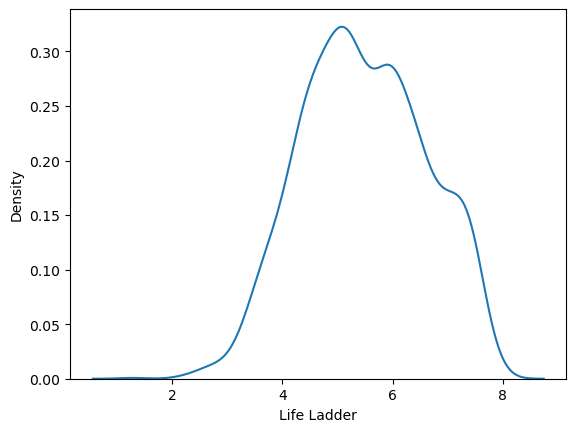

In [454]:
# Plot the distribution curve of the 'Life Ladder'

sns.kdeplot(x=df['Life Ladder'])

In [455]:
# Plot the histogram for the 'Life Ladder'

(array([  1.,   0.,   1.,   4.,  12.,  19.,  62.,  94., 148., 205., 223.,
        253., 207., 212., 203., 167., 119., 129., 103.,  16.]),
 array([1.2812711 , 1.61815426, 1.95503742, 2.29192057, 2.62880373,
        2.96568689, 3.30257004, 3.6394532 , 3.97633636, 4.31321952,
        4.65010267, 4.98698583, 5.32386899, 5.66075215, 5.9976353 ,
        6.33451846, 6.67140162, 7.00828478, 7.34516793, 7.68205109,
        8.01893425]),
 <BarContainer object of 20 artists>)

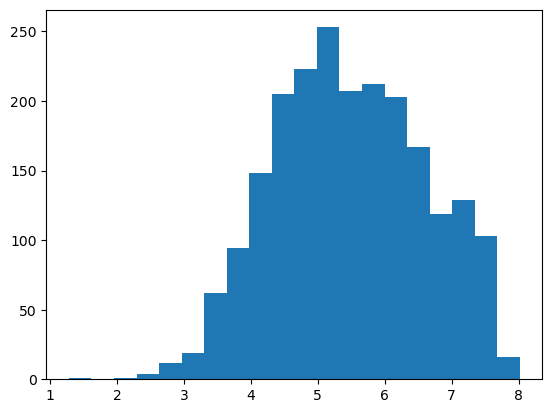

In [456]:
plt.hist(df['Life Ladder'], bins=20)

In [457]:
# Find the median of 'Life Ladder'

median_life = df['Life Ladder'].median(axis=0)
print('Median of Life Ladder:', median_life)

Median of Life Ladder: 5.433267593383789


In [458]:
df['Life Ladder'].describe()

count    2178.000000
mean        5.483058
std         1.125990
min         1.281271
25%         4.646679
50%         5.433268
75%         6.319743
max         8.018934
Name: Life Ladder, dtype: float64

In [459]:
df['Log GDP per capita'].describe()

count    2178.000000
mean        9.389564
std         1.156047
min         5.526723
25%         8.499352
50%         9.500485
75%        10.380630
max        11.663788
Name: Log GDP per capita, dtype: float64

(array([  3.,   8., 101., 203., 295., 260., 441., 359., 434.,  74.]),
 array([ 5.52672338,  6.14042983,  6.75413628,  7.36784272,  7.98154917,
         8.59525561,  9.20896206,  9.8226685 , 10.43637495, 11.0500814 ,
        11.66378784]),
 <BarContainer object of 10 artists>)

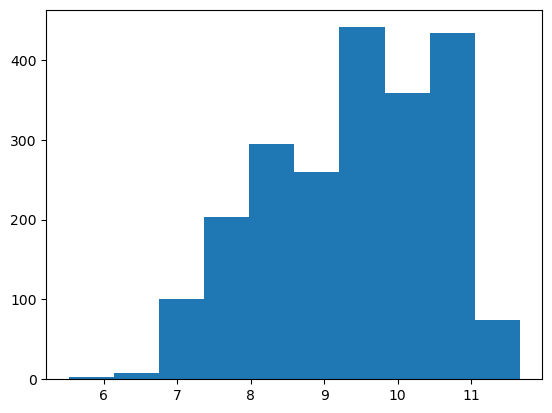

In [460]:
# Plot histogram of 'Log GDP per capita' colunm

plt.hist(df['Log GDP per capita'])

## Outliers

### Finding outliers

<AxesSubplot:xlabel='Life Ladder'>

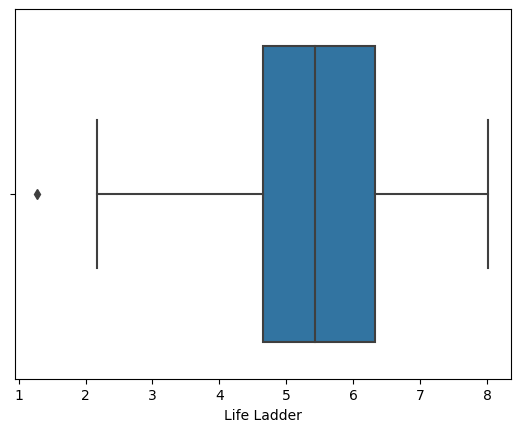

In [461]:
# Find outliers exist in the 'Life Ladder' using a box plot

sns.boxplot(x=df['Life Ladder'], data=df)

<AxesSubplot:xlabel='Log GDP per capita'>

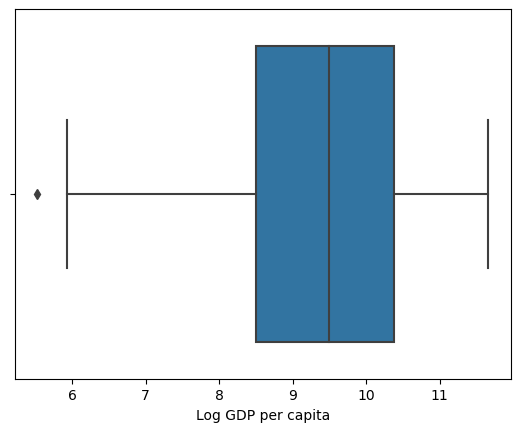

In [462]:
# Find outliers exist in the 'Log GDP per capita' using a box plot

sns.boxplot(x=df['Log GDP per capita'], data=df)

In [463]:
# Find out the Inter Quartile Range for the 'Life Ladder'

Q1 = df['Life Ladder'].quantile(0.25)
Q3 = df['Life Ladder'].quantile(0.75)
IQR = Q3 - Q1
IQR

1.6730635166168213

In [464]:
# Find upper and lower bounds

upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)
print('upper_bound:' ,upper_bound, 'lower_bound:' , lower_bound)

upper_bound: 8.82933783531189 lower_bound: 2.1370837688446045


In [465]:
# Find many outliers

outlier = (df['Life Ladder']<lower_bound) | (df['Life Ladder']>upper_bound)
outlier.value_counts()

False    2177
True        1
Name: Life Ladder, dtype: int64

In [466]:
np.isnan(df['Life Ladder']).value_counts()

False    2178
Name: Life Ladder, dtype: int64

In [467]:
# Removing the outlier

lower = (df['Life Ladder']<lower_bound)
lower.value_counts()  #the outlier is in lower side

False    2177
True        1
Name: Life Ladder, dtype: int64

In [468]:
upper = (df['Life Ladder']>upper_bound)
upper.value_counts()

False    2178
Name: Life Ladder, dtype: int64

In [469]:
#Create a new dataframe which removed outlier

not_outliers = df[~(df['Life Ladder']<lower_bound) & ~(df['Life Ladder']>upper_bound)]
not_outliers.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [470]:
not_outliers.reset_index(drop = True, inplace=True)  #to reset index #drop to drop old index
not_outliers.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2172,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2173,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2174,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2175,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682
2176,Zimbabwe,2022,3.296220,7.670123,0.666172,54.525002,0.651987,-0.069513,0.752632,0.640609,0.191350


In [471]:
not_outliers['Life Ladder'].describe()

count    2177.000000
mean        5.484988
std         1.122640
min         2.178809
25%         4.646891
50%         5.433320
75%         6.320119
max         8.018934
Name: Life Ladder, dtype: float64

<AxesSubplot:xlabel='Life Ladder'>

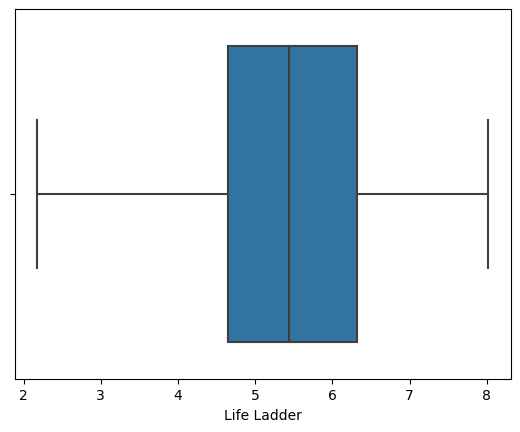

In [472]:
sns.boxplot(x=not_outliers['Life Ladder'], data=not_outliers)

### <font color='blue'>---Answer Question 1 What is the average amount of ladder score by countries?</front>

Refer to the method describe and boxplot, the average of Life Ladder is 5.484988.

In [473]:
not_outliers.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.050945,0.079000,-0.024992,0.162996,0.232760,0.004399,-0.082531,0.026486,0.198987
Life Ladder,0.050945,1.000000,0.785623,0.720859,0.706023,0.526756,0.184768,-0.451367,0.514999,-0.333664
Log GDP per capita,0.079000,0.785623,1.000000,0.684586,0.819493,0.364376,0.004062,-0.384069,0.239642,-0.248893
Social support,-0.024992,0.720859,0.684586,1.000000,0.594223,0.404803,0.070266,-0.232802,0.432816,-0.431139
Healthy life expectancy at birth,0.162996,0.706023,0.819493,0.594223,1.000000,0.367725,0.025442,-0.314673,0.208788,-0.147184
Freedom to make life choices,0.232760,0.526756,0.364376,0.404803,0.367725,1.000000,0.322084,-0.484169,0.578490,-0.266575
Generosity,0.004399,0.184768,0.004062,0.070266,0.025442,0.322084,1.000000,-0.277218,0.311626,-0.079722
Perceptions of corruption,-0.082531,-0.451367,-0.384069,-0.232802,-0.314673,-0.484169,-0.277218,1.000000,-0.284285,0.251928
Positive affect,0.026486,0.514999,0.239642,0.432816,0.208788,0.578490,0.311626,-0.284285,1.000000,-0.328144
Negative affect,0.198987,-0.333664,-0.248893,-0.431139,-0.147184,-0.266575,-0.079722,0.251928,-0.328144,1.000000


(0.0, 8.310940492153168)

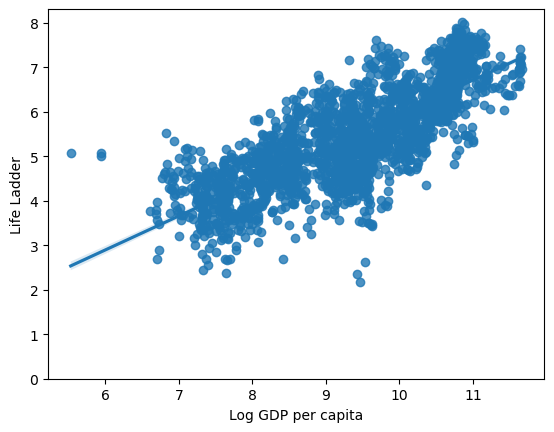

In [474]:
#Plot scatter plot of Log GDP per capita as the most correlation variable of price

sns.regplot(x='Log GDP per capita', y='Life Ladder', data = not_outliers)
plt.ylim(0,)

#positive linear regression

#### NOTE: 
See more about model development and model evaluation in Document 2: Model Evaluation**

# Visualization

In [475]:
df=not_outliers
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


### <font color='blue'>---Answer Question 2 Which country owns the highest happiness score and the top 10 ranking?</front>

as following:

In [476]:
#Find mean of each country

grouped_mean = df.groupby('Country name')['Life Ladder'].mean()
grouped_mean.head(10)

Country name
Afghanistan    3.505506
Albania        5.048016
Algeria        5.377251
Angola         4.420299
Argentina      6.283633
Armenia        4.617078
Australia      7.255915
Austria        7.215172
Azerbaijan     4.940989
Bahrain        6.001723
Name: Life Ladder, dtype: float64

In [477]:
#Sorting descendent

top_countries = grouped_mean.sort_values(ascending=False)
top_countries.head(10)

Country name
Denmark        7.673428
Finland        7.619146
Norway         7.481820
Switzerland    7.474483
Iceland        7.458607
Netherlands    7.451992
Sweden         7.377259
Canada         7.323657
New Zealand    7.278497
Israel         7.265653
Name: Life Ladder, dtype: float64

In [478]:
df_top_countries = pd.DataFrame(top_countries.head(10))
df_top_countries

,Life Ladder
Country name,
Denmark,7.673428
Finland,7.619146
Norway,7.481820
Switzerland,7.474483
Iceland,7.458607
Netherlands,7.451992
Sweden,7.377259
Canada,7.323657
New Zealand,7.278497


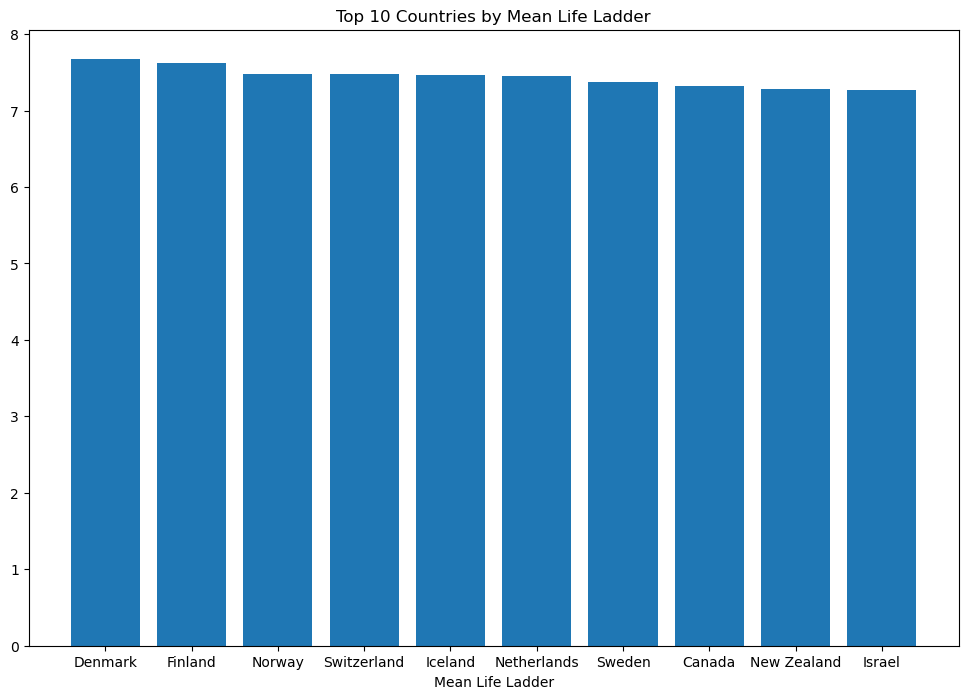

In [479]:
# Visualization in bar chart

plt.figure(figsize=(12, 8))

plt.bar(df_top_countries.index, df_top_countries['Life Ladder'])  # index is Country name

# Add labels and title
plt.xlabel('Mean Life Ladder')
plt.title('Top 10 Countries by Mean Life Ladder')

# Display the chart
plt.show()

Conclusion: It can be seen that Denmark is the most score of happiness , and followed by countries shown as the above figure.

### <font color='blue'>---Answer Question 3 Which country owns the least happiness score and the last 10 ranking?</front>

as following:

In [480]:
df_least_countries = pd.DataFrame(top_countries.tail(10))
df_least_countries

,Life Ladder
Country name,
Botswana,3.953261
Yemen,3.912124
Comoros,3.886998
Zimbabwe,3.805361
Tanzania,3.691510
Togo,3.661006
Rwanda,3.654473
Burundi,3.548124
Central African Republic,3.514954


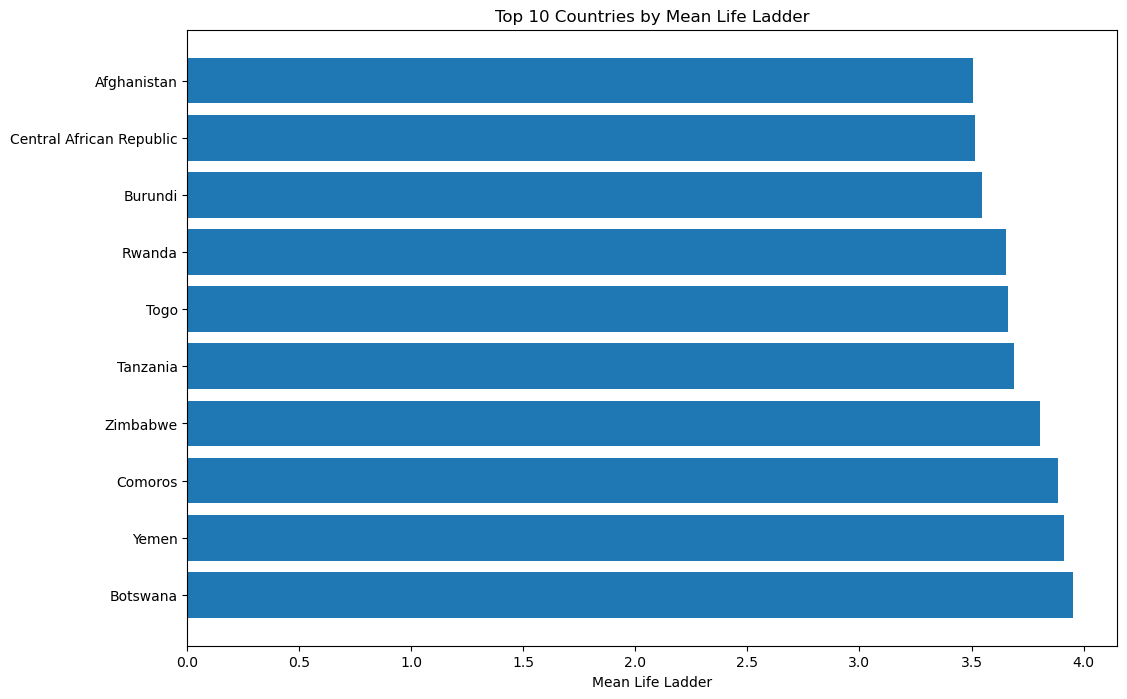

In [481]:
# Visualization in bar chart horizontal

plt.figure(figsize=(12, 8))

plt.barh(df_least_countries.index, df_least_countries['Life Ladder'])  # index is Country name

# Add labels and title
plt.xlabel('Mean Life Ladder')
plt.title('Top 10 Countries by Mean Life Ladder')

# Display the chart
plt.show()

### <font color='blue'>---Answer Question 3 What is the effect between Perceptions of corruption and Freedom to make life choices?</front>

as following:

Conclusion: It can be seen that Afganistan is the least score of happiness , and followed by countries shown as the above figure.

In [482]:
df_find = df[['Country name', 'Freedom to make life choices', 'Perceptions of corruption']]
df_find.head()

,Country name,Freedom to make life choices,Perceptions of corruption
0,Afghanistan,0.718114,0.881686
1,Afghanistan,0.678896,0.850035
2,Afghanistan,0.600127,0.706766
3,Afghanistan,0.495901,0.731109
4,Afghanistan,0.530935,0.775620


In [483]:
life_mean = df_find.groupby('Country name').mean()
life_mean.head()

,Freedom to make life choices,Perceptions of corruption
Country name,,
Afghanistan,0.508496,0.851207
Albania,0.683099,0.869554
Algeria,0.530804,0.697673
Angola,0.455957,0.867018
Argentina,0.774616,0.838603


In [484]:
top_corrup = life_mean.sort_values(by='Perceptions of corruption', ascending=False)
top_corrup.head(10)

,Freedom to make life choices,Perceptions of corruption
Country name,,
Romania,0.755027,0.948680
Bosnia and Herzegovina,0.516217,0.942537
Bulgaria,0.683363,0.938307
Moldova,0.669713,0.927411
Ukraine,0.593320,0.927270
Trinidad and Tobago,0.831941,0.927045
Croatia,0.650914,0.924696
Indonesia,0.788546,0.921180
Portugal,0.836342,0.916044


In [485]:
# Reset index country name into colunm

top_corrup = top_corrup.reset_index()
top_corrup.head()

,Country name,Freedom to make life choices,Perceptions of corruption
0,Romania,0.755027,0.948680
1,Bosnia and Herzegovina,0.516217,0.942537
2,Bulgaria,0.683363,0.938307
3,Moldova,0.669713,0.927411
4,Ukraine,0.593320,0.927270


In [486]:
top_10_corrup = top_corrup.head(10)
top_10_corrup

,Country name,Freedom to make life choices,Perceptions of corruption
0,Romania,0.755027,0.948680
1,Bosnia and Herzegovina,0.516217,0.942537
2,Bulgaria,0.683363,0.938307
3,Moldova,0.669713,0.927411
4,Ukraine,0.593320,0.927270
5,Trinidad and Tobago,0.831941,0.927045
6,Croatia,0.650914,0.924696
7,Indonesia,0.788546,0.921180
8,Portugal,0.836342,0.916044
9,Slovakia,0.676292,0.914722


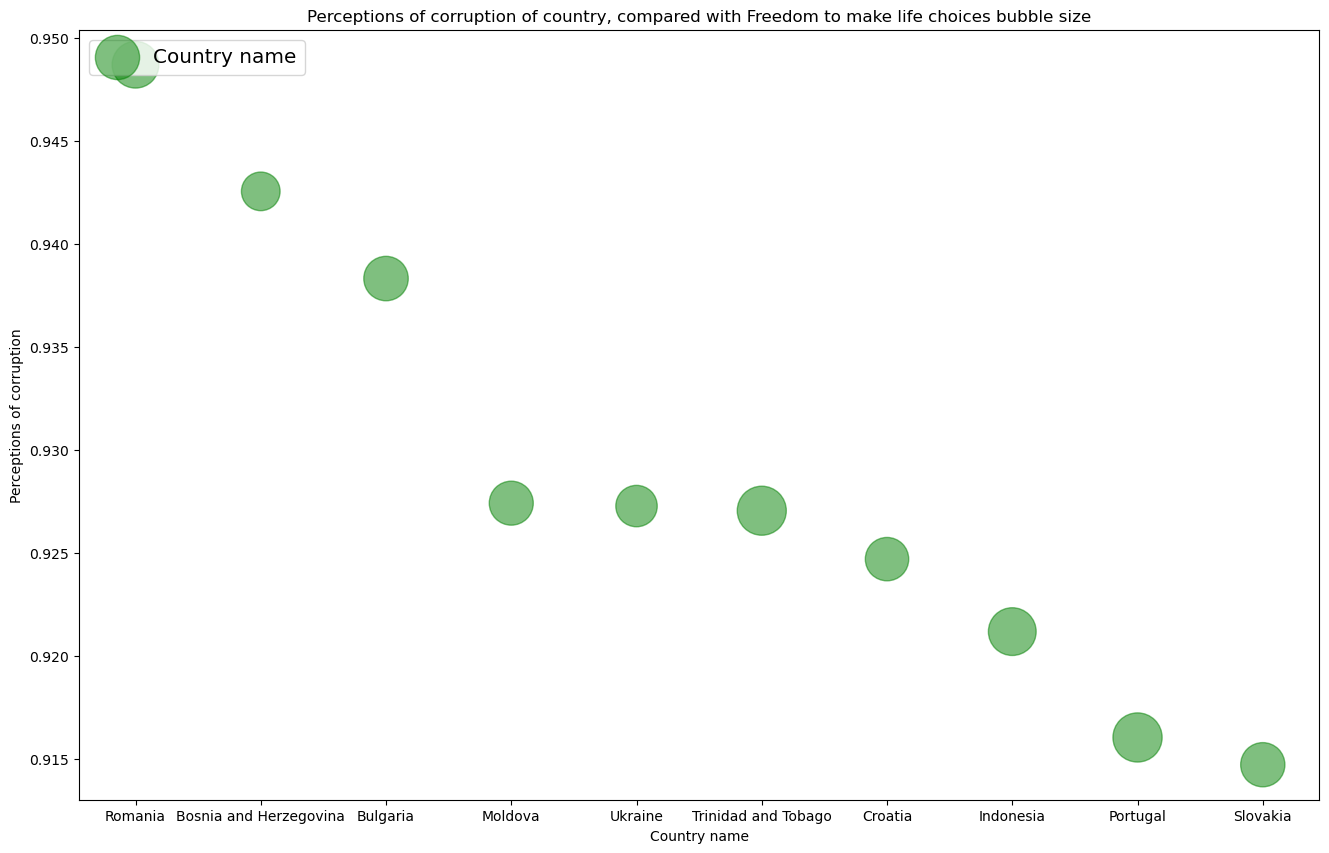

In [487]:
# Bubble plot for country and Corruption, with see the size of Life Ladder

top_10_corrup = top_corrup.head(10)

ax0 = top_10_corrup.plot(kind = 'scatter',
    x = 'Country name',
    y = 'Perceptions of corruption',
    figsize = (16,10),
    alpha = 0.5,
    color = 'green',
    s=top_10_corrup['Freedom to make life choices']*1500
)

ax0.set_ylabel('Perceptions of corruption')
ax0.set_title('Perceptions of corruption of country, compared with Freedom to make life choices bubble size')
ax0.legend(['Country name', 'Perceptions of corruption'], loc='upper left', fontsize='x-large')

In [488]:
last_10_corrup = top_corrup.tail(10)
last_10_corrup

,Country name,Freedom to make life choices,Perceptions of corruption
149,Norway,0.951594,0.334880
150,United Arab Emirates,0.919743,0.299117
151,Switzerland,0.917081,0.298382
152,New Zealand,0.916543,0.266186
153,Sweden,0.931547,0.255248
154,Finland,0.942529,0.241205
155,Denmark,0.943526,0.198935
156,Rwanda,0.868012,0.185955
157,Qatar,0.898004,0.183798
158,Singapore,0.845741,0.101382


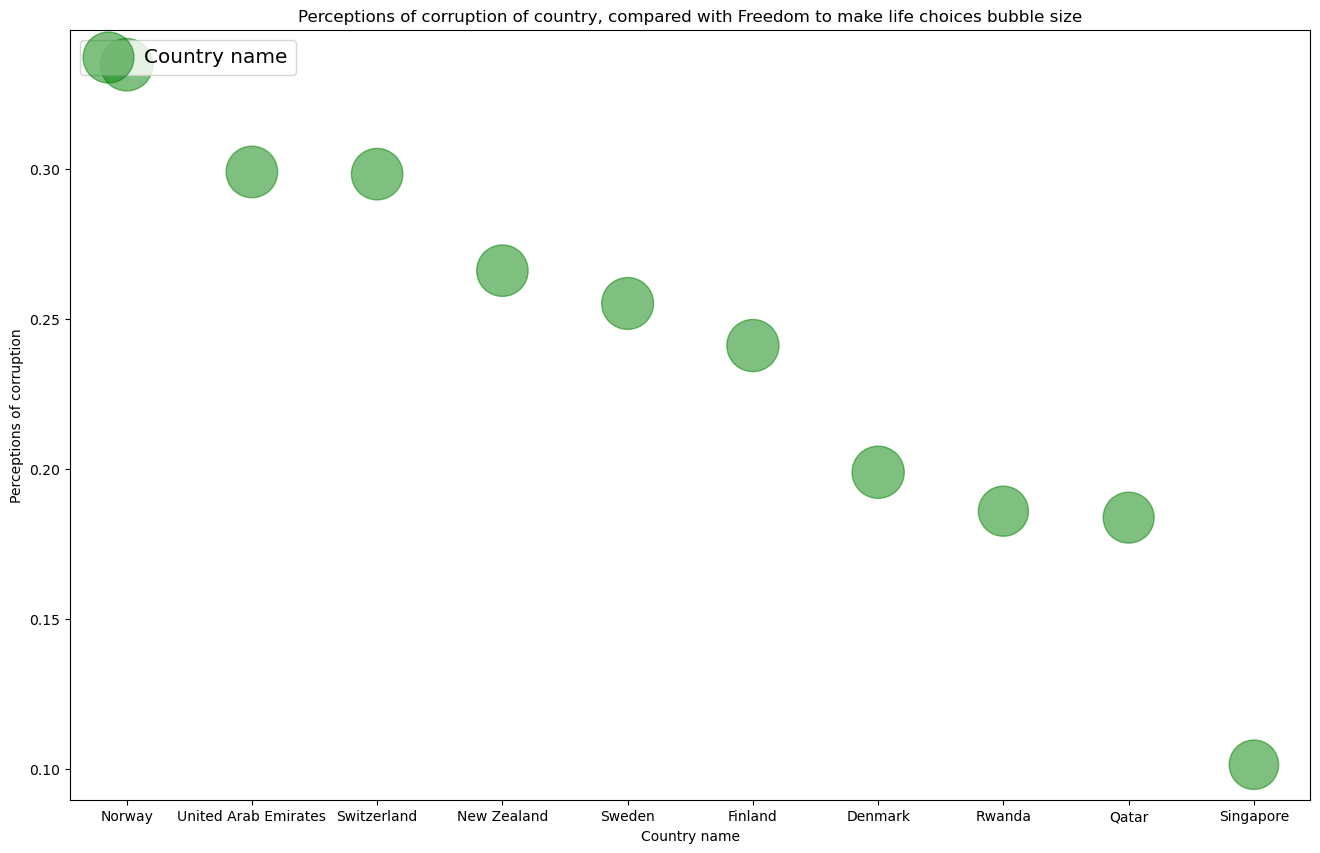

In [489]:
last_10_corrup = top_corrup.tail(10)

ax0 = last_10_corrup.plot(kind = 'scatter',
    x = 'Country name',
    y = 'Perceptions of corruption',
    figsize = (16,10),
    alpha = 0.5,
    color = 'green',
    s=last_10_corrup['Freedom to make life choices']*1500
)

ax0.set_ylabel('Perceptions of corruption')
ax0.set_title('Perceptions of corruption of country, compared with Freedom to make life choices bubble size')
ax0.legend(['Country name', 'Perceptions of corruption'], loc='upper left', fontsize='x-large')

Conclusion: The figures is showed that when the number of Perceptions of corruption increase, the Freedom to make life choices tend to be decresing.

### <font color='blue'>---Answer Question 5 Comparison of Log GDP per capita and Healthy life expectancy at birth?</front>

as following:

In [490]:
df_log_life = df[['Country name','Log GDP per capita', 'Healthy life expectancy at birth']]
df_log_life.head()

,Country name,Log GDP per capita,Healthy life expectancy at birth
0,Afghanistan,7.350416,50.500000
1,Afghanistan,7.508646,50.799999
2,Afghanistan,7.613900,51.099998
3,Afghanistan,7.581259,51.400002
4,Afghanistan,7.660506,51.700001


In [491]:
log_life_mean = df_log_life.groupby('Country name').mean()
log_life_mean.head(10)

,Log GDP per capita,Healthy life expectancy at birth
Country name,,
Afghanistan,7.585588,52.353846
Albania,9.396952,68.505334
Algeria,9.339902,66.080000
Angola,8.985655,52.150001
Argentina,10.030438,66.664706
Armenia,9.314330,65.720313
Australia,10.760761,70.531250
Austria,10.886598,70.426667
Azerbaijan,9.513446,62.289285


In [492]:
df_sort = log_life_mean.sort_values(by='Healthy life expectancy at birth', ascending=False)
df_sort.head(20)

,Log GDP per capita,Healthy life expectancy at birth
Country name,,
Hong Kong S.A.R. of China,10.901130,77.279778
Japan,10.589308,73.481176
Singapore,11.346963,72.774287
Switzerland,11.134667,72.071666
South Korea,10.533928,71.870588
Iceland,10.882260,71.842500
Israel,10.515885,71.835294
Cyprus,10.536376,71.653334
France,10.678276,71.588235


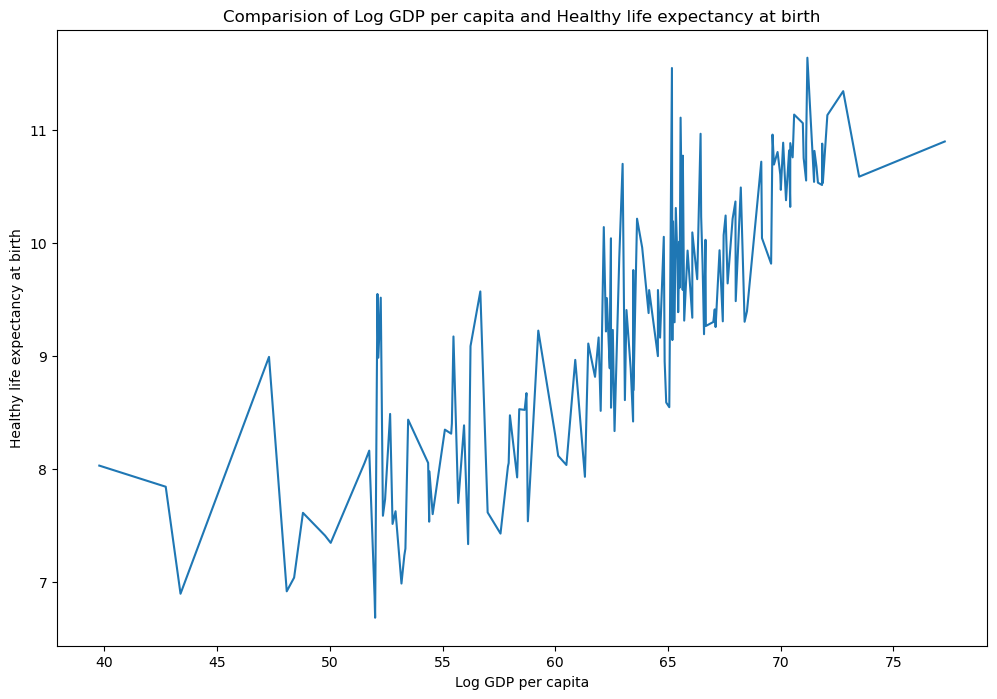

In [493]:
#Line graph of Log GDP per capita and Healthy life expectancy at birth 

df_plot = df_sort
plt.figure(figsize=(12, 8))

plt.plot(df_plot['Healthy life expectancy at birth'], df_plot['Log GDP per capita'])
plt.title('Comparision of Log GDP per capita and Healthy life expectancy at birth')
plt.xlabel('Log GDP per capita')
plt.ylabel('Healthy life expectancy at birth')
plt.show()

Conclusion: When the amoung of Log GDP per capita climb, the Healthy life expectancy also rise.